# This file verifys the code for calculating the grid and the volume of corresponding grid cells


In [26]:
import numpy as np

from openairclim.calc_swv import get_volume_matrix
import numpy as np
heights = np.array([0,1000,2000,4000])
latitudes = [-89,-45,0,45,36]
delta_h = 500
delta_deg = 1
volume = get_volume_matrix(heights, latitudes, delta_h, delta_deg)
volume

array([[3.88416588e+13, 1.57371996e+15, 2.22557611e+15, 1.57371996e+15,
        1.80052889e+15],
       [3.88538530e+13, 1.57421402e+15, 2.22627482e+15, 1.57421402e+15,
        1.80109416e+15],
       [3.88660492e+13, 1.57470817e+15, 2.22697364e+15, 1.57470817e+15,
        1.80165952e+15],
       [3.88904472e+13, 1.57569668e+15, 2.22837162e+15, 1.57569668e+15,
        1.80279051e+15]])

In [12]:
np.sin(np.deg2rad(30))

np.float64(-0.49999999999999994)

In [14]:
rad = np.deg2rad(1)
print(rad, np.sin(rad))




0.017453292519943295 0.01745240643728351


In [27]:
# hand calculation
R = 6371000
l = 36
h = 4000

dl = np.deg2rad(1)
dh = 500


v = 2*np.pi*(R+h)**2*np.cos(np.deg2rad(l))*dl*dh
v


np.float64(1802790509297726.5)

In [29]:
delta_h = 100.0  # height increment in meters
delta_deg = 1.0  # latitude increment
heights = np.arange(0, 100000 + delta_h, delta_h)  # 0 to 60 km
latitudes = np.arange(
    -90, 91, delta_deg
)
volume = get_volume_matrix(heights, latitudes, delta_h, delta_deg)
volume

array([[2.72554466e-02, 7.76833176e+12, 1.55342972e+13, ...,
        1.55342972e+13, 7.76833176e+12, 2.72554466e-02],
       [2.72563022e-02, 7.76857563e+12, 1.55347849e+13, ...,
        1.55347849e+13, 7.76857563e+12, 2.72563022e-02],
       [2.72571578e-02, 7.76881950e+12, 1.55352725e+13, ...,
        1.55352725e+13, 7.76881950e+12, 2.72571578e-02],
       ...,
       [2.81160331e-02, 8.01361563e+12, 1.60247902e+13, ...,
        1.60247902e+13, 8.01361563e+12, 2.81160331e-02],
       [2.81169021e-02, 8.01386332e+12, 1.60252855e+13, ...,
        1.60252855e+13, 8.01386332e+12, 2.81169021e-02],
       [2.81177711e-02, 8.01411101e+12, 1.60257808e+13, ...,
        1.60257808e+13, 8.01411101e+12, 2.81177711e-02]])

In [31]:
np.sum(volume)

np.float64(5.186173624983938e+19)

In [54]:

data = []
for dh in [100,1000,10000]:
    for dl in [0.1,1,2,3]:
        for h in [100000]:
            heights = np.arange(0, h + dh, dh)  # 0 to 60 km
            latitudes = np.arange(-90, 91, dl)
            volume = get_volume_matrix(heights, latitudes, dh, dl)
            v = np.sum(volume)
            print(dh, dl, h, "The volume is:\n", v)
            data.append(v)


100 0.1 100000 The volume is:
 5.185948506725682e+19
100 1 100000 The volume is:
 5.186173624983938e+19
100 2 100000 The volume is:
 5.185778655224592e+19
100 3 100000 The volume is:
 5.185120345553722e+19
1000 0.1 100000 The volume is:
 5.232577320050747e+19
1000 1 100000 The volume is:
 5.232804462431919e+19
1000 2 100000 The volume is:
 5.2324059413509325e+19
1000 3 100000 The volume is:
 5.2317417125702386e+19
10000 0.1 100000 The volume is:
 5.698867319279046e+19
10000 1 100000 The volume is:
 5.6991147029704294e+19
10000 2 100000 The volume is:
 5.698680668530884e+19
10000 3 100000 The volume is:
 5.697957248415081e+19


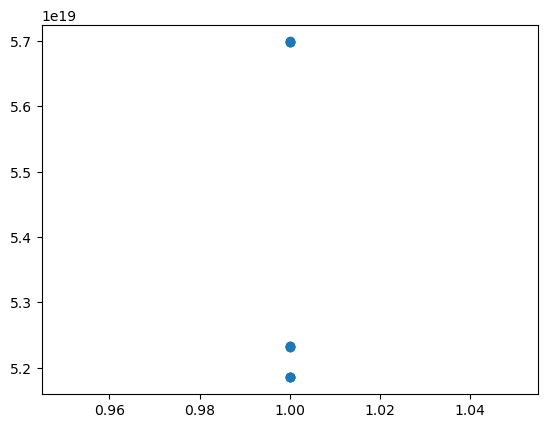

In [55]:
import matplotlib.pyplot as plt

plt.scatter(np.ones(len(data)), data)
# plt.yscale('log')
plt.show()


In [58]:
radius = R+10000
volume_simple = 4/3*np.pi*(radius**3-R**3)
volume_simple

5.620402068296707e+18